In [289]:
from __future__ import annotations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Логистическая регрессия

Модель логистической регрессии:
  $$
  \hat y = \sigma (Xw).
  $$
  Сигмоида меняется в пределах от 0 до 1 и имеет вид:
  $$
  \sigma(x) = \frac{1}{1+e^{-x}}.
  $$

  Функция потерь log-loss:
  $$
  L = -\frac{1}{\ell}\sum_{i = 1}^{\ell}(y_i\log(\hat y_i) + (1 - y_i)\log(1 - \hat y_i)),
  $$
  где $\ell$ - количество объектов.

## Градиентный спуск

Итеративный метод оптимизации, при котором вектор весов модели $\mathbf{w}^{(t+1)}$ на шаге $t+1$ может быть выражен как:
$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \eta_t \nabla L(\mathbf{w}^{(t)}),
$$
где $\eta_t$ - шаг обучения.

In [3]:
'''Реализация логистической регрессию, обучаемой с помощью:
1) градиентного спуска 
2) стохастического градиентного спуска 

В качестве критерия останова (одновременно):
- проверка на евклидову норму разности весов на двух соседних итерациях 
- достижение максимального числа итераций

В loss_history содержатся значения функции потерь для всех итераций градиентного спуска, начиная с нулевой.

Инициализирую веса нулевым вектором'''

'Реализация логистической регрессию, обучаемой с помощью:\n1) градиентного спуска \n2) стохастического градиентного спуска \n\nВ качестве критерия останова (одновременно):\n- проверка на евклидову норму разности весов на двух соседних итерациях \n- достижение максимального числа итераций\n\nВ loss_history содержатся значения функции потерь для всех итераций градиентного спуска, начиная с нулевой.\n\nИнициализирую веса нулевым вектором'

In [292]:
def sigmoida(x):
    return 1/(1+np.exp(-x))

In [293]:
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, gd_type: str = 'stochastic', tolerance: float = 1e-4,
                 max_iter: int = 1000, eta: float = 1e-2,
                 w_0: np.array = None) -> None:
        """
        Args:
          gd_type: Type of gradient descent ('full' or 'stochastic').

          tolerance: Threshold for stopping gradient descent.

          max_iter: Maximum number of steps in gradient descent.

          eta: Learning rate.

          w0: Array of shape d (d — number of weights to optimize).
              Initial weights.
        """
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.eta = eta
        self.w_0 = w_0
        self.w = None
        self.loss_history = None

    def fit(self, X: np.array, y: np.array) -> LogReg:
        
        X = np.column_stack([np.ones(X.shape[0]), X])
        if self.w_0 is None:
            self.w_0 = np.zeros(X.shape[1])
            
        self.w = self.w_0
  
        self.loss_history = []
        
        for i in range(self.max_iter):
           w_old = self.w.copy()
           if self.gd_type == 'full': 
               
               self.w= self.w - self.eta * self.calc_gradient(X,y)
           elif self.gd_type == 'stochastic':
               randind = np.random.randint(0,len(y))
               grad = self.calc_gradient(X[randind:randind+1,:],y[randind:randind+1])
               self.w = self.w - self.eta * grad
               
           self.loss_history.append(self.calc_loss(X,y))    
           if np.sqrt(np.sum((self.w- w_old)**2)) < self.tolerance:
               break
        return self


    def predict_proba(self, X: np.array) -> np.array:
        """Calculate probability of positive and negative class for each observation.

        Args:
          X: Array of shape (n, d).
             Data.

        Returns:
             Array of shape (n, 2).
             Predicted probabilities.
        """
        X = np.column_stack([np.ones(X.shape[0]), X])
        if self.w is None:
            raise Exception('Not trained yet')
        else:
            class_1 = sigmoida(X.dot(self.w))
            class_0 = 1 - class_1
            return np.column_stack([class_0, class_1])
        


    def predict(self, X: np.array) -> np.array:
        """Predict class for each observation.

        Args:
          X: Array of shape (n, d).
             Data.

        Returns:
             Array of shape (n,).
             Predicted class labels.
        """
        if self.w is None:
            raise Exception('Not trained yet')
        else:
            versti = self.predict_proba(X)
            return np.where(versti[:, 1]>0.5, 1,0)
        
       

    def calc_gradient(self, X: np.array, y: np.array) -> np.array:
        z = sigmoida( X.dot(self.w))
        return X.T.dot(z-y) / len(y)

    def calc_loss(self, X: np.array, y: np.array) -> float:
        z = sigmoida(X.dot(self.w))
        loss = -np.mean(y*(np.log(z))+(1-y)*(np.log(1-z)))
        return loss
       
       

In [294]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_test

array([1, 0, 0, ..., 0, 1, 1])

'''Обучение логистической регрессии на синтетических данных. Кривая обучения.'''

In [4]:
'''обычный гд'''

'''обучаем'''

model = LogReg(gd_type='full')
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)





NameError: name 'LogReg' is not defined

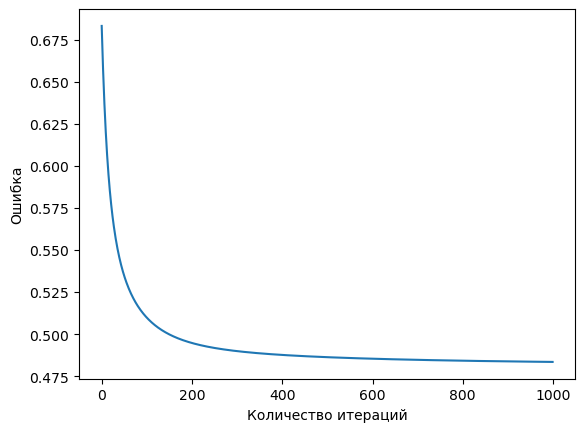

In [296]:
'''кривая обучения '''
losses= model.loss_history
x = np.arange(len(model.loss_history))
plt.plot(x, losses)
plt.xlabel('Количество итераций')
plt.ylabel('Ошибка')
plt.show()

In [297]:
'''стохастический гд'''

model2 = LogReg(gd_type='stochastic')
model2.fit(X_train, y_train)
y_predicted2 = model2.predict(X_test)

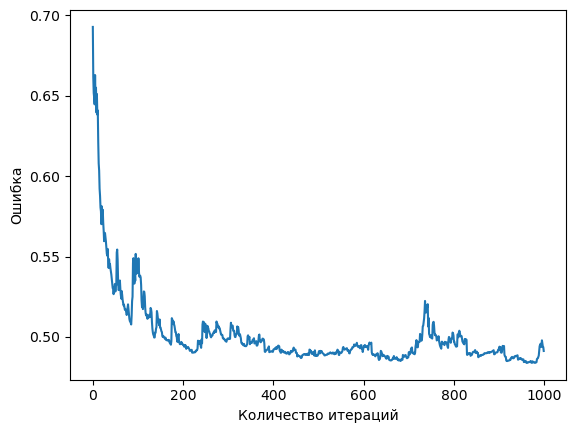

In [298]:
y2=model2.loss_history
x2 = np.arange(len(model2.loss_history))
plt.plot(x2,y2)
plt.xlabel('Количество итераций')
plt.ylabel('Ошибка')
plt.show()

In [6]:
'''ручками напишем ROC-AUC и PR-AUC. построим ROC и PR кривые'''

SyntaxError: invalid syntax (2646242197.py, line 1)

In [299]:
'''данные для roc и pr'''

probabilities = model.predict_proba(X_test)[:, 1]
porogi = np.sort(probabilities)[::-1]

def calc_tpr(y_t, y_p):
    tp = np.sum((y_t==1) & (y_p==1))
    fn = np.sum((y_t==1) & (y_p==0))
    return tp/(tp+fn)
    
def calc_precision(y_t, y_p):
    tp = np.sum((y_t==1) & (y_p==1))
    fp = np.sum((y_t==0) & (y_p==1))
    return tp/(tp+fp)
    
def calc_fpr(y_t, y_p):
    fp = np.sum((y_t==0) &(y_p==1))
    tn = np.sum((y_t==0)&(y_p==0))
    return fp/(fp+tn)

tpr_list = []
fpr_list = []
precision_list = []
for porog in porogi:
    prognos = np.where(probabilities>=porog, 1, 0)
    fpr = calc_fpr(y_test, prognos)
    tpr = calc_tpr(y_test, prognos)
    precision = calc_precision(y_test, prognos)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    precision_list.append(precision)

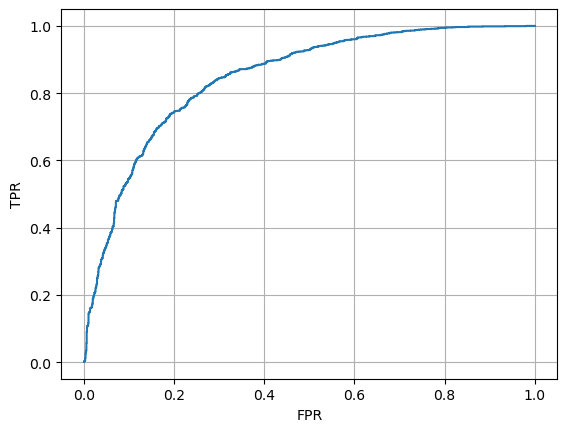

In [300]:
'''roc'''
plt.plot(fpr_list, tpr_list)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.show()

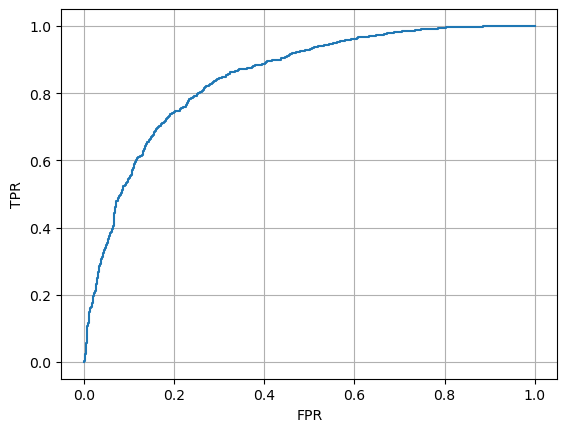

0.847325723170665


In [301]:
'''готовая roc из библиотеки'''
from sklearn.metrics import roc_curve, auc

fpr_logreg, tpr_logreg, _= roc_curve(y_test, probabilities)
plt.plot(fpr_logreg, tpr_logreg)
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.grid()
plt.show()
'''вроде похожи,ура'''

'''ROC AUC:'''
roc_auc = auc(fpr_logreg, tpr_logreg)
print(roc_auc)

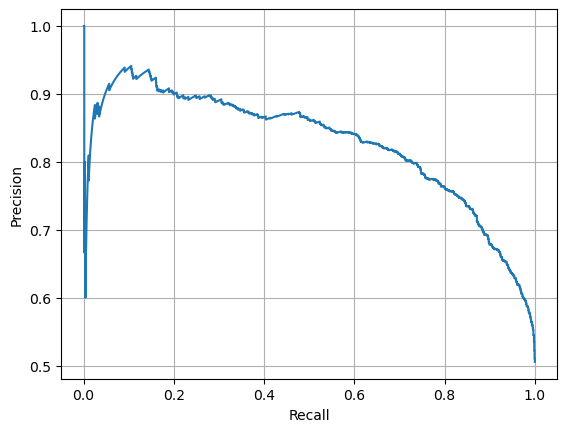

In [302]:
'''PR'''

plt.plot(tpr_list, precision_list)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

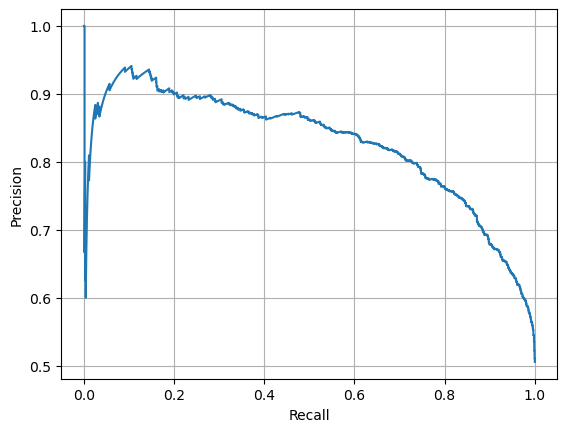

0.8262472298789882


In [303]:
'''готовая PR из библиотеки'''
from sklearn.metrics import precision_recall_curve
prec, rec, _ = precision_recall_curve(y_test, probabilities)


plt.plot(rec, prec)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()
'''вроде похожи,ура'''

'''PR-AUC'''
pr_auc = auc(rec, prec)
print(pr_auc)

In [ ]:
 '''Оценим ошибку ROC-AUC и PR-AUC вашей модели при помощи K-fold кросс валидации.'''

In [304]:
from sklearn.model_selection import KFold


kf = KFold(n_splits=5, shuffle=True, random_state=14)

roc_scores = []
pr_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)

    y_pred_proba = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _= roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_scores.append(roc_auc)
    
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    pr_scores.append(pr_auc)

print(f"ROC-AUC: {np.mean(roc_scores):.3f} ± {np.std(roc_scores):.3f}")
print(f"PR-AUC: {np.mean(pr_scores):.3f} ± {np.std(pr_scores):.3f}")

ROC-AUC: 0.850 ± 0.007
PR-AUC: 0.821 ± 0.009
